# Data preprocessing & discover the data errors

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

In [52]:
data = pd.read_csv("../Data/Telco-Customer-Churn.csv", encoding = "UTF-8")

In [53]:
pd.set_option('display.max_columns', None)
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0.0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0.0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0.0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0.0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,NaN,Yes
9,6388-TABGU,Male,0.0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


Drop unnecessary ID column 

In [54]:
data.drop(["customerID"], axis = 1, inplace = True)

<Axes: xlabel='InternetService'>

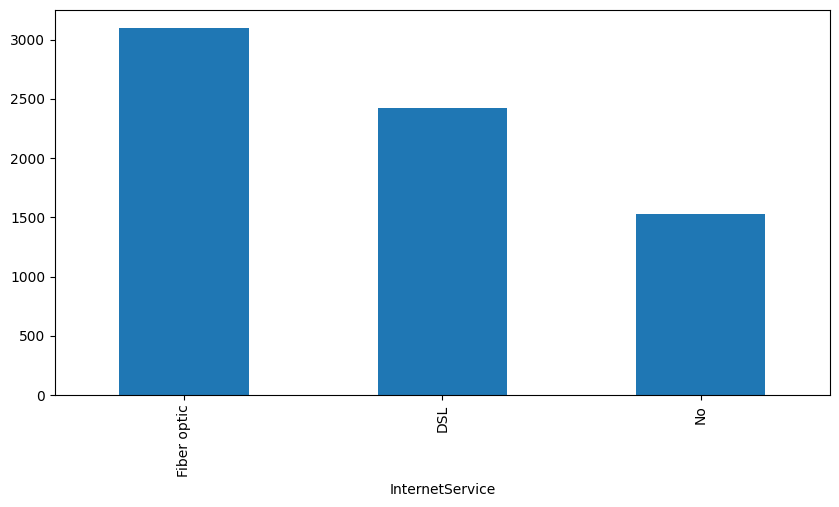

In [55]:
data['InternetService'].value_counts().plot(kind='bar', figsize=(10, 5))

### Here we noted that there are Imbalance in Churn class distribution  

<Axes: title={'center': 'Churn'}, ylabel='count'>

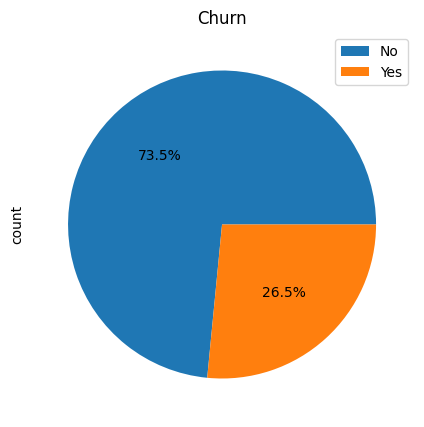

In [56]:
data['Churn'].value_counts().plot(kind='pie', figsize=(10, 5), autopct='%1.1f%%', title='Churn', legend=True, labels=None)

Here I discovered that I needn't the phone service column cause it is a derived attribute from the MultipleLines if MultipleLines = No phone service then phone Service will be NO

In [57]:
phone = data[["MultipleLines", "PhoneService"]]
phone = phone[phone["PhoneService"] == "No"]
print(phone)
phone.nunique()

         MultipleLines PhoneService
0     No phone service           No
3     No phone service           No
7     No phone service           No
20    No phone service           No
27    No phone service           No
...                ...          ...
7003  No phone service           No
7007  No phone service           No
7029  No phone service           No
7036  No phone service           No
7040  No phone service           No

[682 rows x 2 columns]


MultipleLines    1
PhoneService     1
dtype: int64

In [58]:
data.drop(["PhoneService"], axis = 1, inplace = True)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7023 non-null   float64
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


In [60]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7023.000000,7043.000000,7043.000000
mean,0.162324,32.371149,64.761692
std,0.368774,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [61]:
data.describe(include = "O")

,gender,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7033,7043
unique,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6518,2
top,Male,No,No,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,3555,3641,4933,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,20,5174


- Here you can see that Total charge not only has null as missing values but also there are spaces which consider missing value too.

In [62]:
data.isnull().sum()

gender               0
SeniorCitizen       20
Partner              0
Dependents           0
tenure               0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [63]:
data[data['TotalCharges'] == " "]

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
15,Female,0.0,Yes,Yes,69,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,,No
100,Male,0.0,No,No,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,,No
488,Female,0.0,Yes,Yes,0,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
556,Female,0.0,No,No,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),19.90,,No
753,Male,0.0,No,Yes,0,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0.0,Yes,Yes,0,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0.0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0.0,Yes,Yes,0,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0.0,Yes,Yes,0,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0.0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No


In [64]:
data['TotalCharges'] = data['TotalCharges'].replace(" ", None)

In [65]:
data['TotalCharges'].isnull().sum()

np.int64(30)

## Handle missing values

In [66]:
imputer = KNNImputer(n_neighbors=5)
data["SeniorCitizen"] = imputer.fit_transform(
    data["SeniorCitizen"].values.reshape(-1, 1)
)
data["SeniorCitizen"] = data["SeniorCitizen"].round().astype(int)
print(data["SeniorCitizen"].isnull().sum())

0


## And I discoverd that the TotalCharges is derived attribute from monthly charges and tenure 

In [67]:
null_rows = data[data["TotalCharges"].isnull()]
null_rows.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,Female,0,Yes,No,28,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,NaN,Yes
15,Female,0,Yes,Yes,69,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,None,No
64,Female,0,No,No,9,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,94.40,NaN,Yes


In [68]:
null_rows_index = null_rows.index
for index in null_rows_index:
    if data.loc[index, "tenure"] != 0:
        data.loc[index, 'TotalCharges'] = data.loc[index, 'MonthlyCharges'] * data.loc[index, 'tenure']
    else:
        data.loc[index, "TotalCharges"] = data.loc[index, "MonthlyCharges"]

data.loc[null_rows_index, ["tenure", "MonthlyCharges", "TotalCharges"]]

,tenure,MonthlyCharges,TotalCharges
8,28,104.80,2934.4
15,69,113.25,7814.25
64,9,94.40,849.6
87,48,20.65,991.2
100,1,20.20,20.2
115,3,89.85,269.55
135,43,25.70,1105.1
154,6,19.70,118.2
239,16,19.75,316.0
287,1,70.00,70.0


In [69]:
# discover is there any duplicate values in the data
print(data.duplicated().sum())

21


In [70]:
data.drop_duplicates(inplace = True)

In [71]:
data.shape

(7022, 19)

In [72]:
data.head(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


# Fixing the features data types and convert categorical 

In [73]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [74]:
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [75]:
columns_to_select = ["PaperlessBilling",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    'PaymentMethod',
    'Contract',
    'MultipleLines',
    'InternetService']

data[columns_to_select].nunique()


PaperlessBilling    2
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
PaymentMethod       4
Contract            3
MultipleLines       3
InternetService     3
dtype: int64

In [76]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [77]:
for column in columns_to_select:
    print(column, data[column].unique())

PaperlessBilling ['Yes' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Contract ['Month-to-month' 'One year' 'Two year']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']


In [78]:
data.loc[:, ['PaymentMethod', 'PaperlessBilling', 'Contract']].head(10)

,PaymentMethod,PaperlessBilling,Contract
0,Electronic check,Yes,Month-to-month
1,Mailed check,No,One year
2,Mailed check,Yes,Month-to-month
3,Bank transfer (automatic),No,One year
4,Electronic check,Yes,Month-to-month
5,Electronic check,Yes,Month-to-month
6,Credit card (automatic),Yes,Month-to-month
7,Mailed check,No,Month-to-month
8,Electronic check,Yes,Month-to-month
9,Bank transfer (automatic),No,One year


In [79]:
# IS there no internet service we sure the online security, online backup, device protection, tech support, streaming tv, streaming movies columns are all no

binary_features = [
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
]

for feature in binary_features:
    data[feature] = data[feature].replace({"Yes": 1, "No": 0, "No internet service": 0})

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13576\3744615395.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[feature] = data[feature].replace({"Yes": 1, "No": 0, "No internet service": 0})


In [80]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [81]:
dataToDiscover = [
    "Churn",
    "SeniorCitizen",
    "gender",
    "Partner",
    "Dependents",
    "PaperlessBilling",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
]
for col in dataToDiscover:
    print(f"Unique values in {col}: {data[col].unique()}")

Unique values in Churn: ['No' 'Yes']
Unique values in SeniorCitizen: [0 1]
Unique values in gender: ['Female' 'Male']
Unique values in Partner: ['Yes' 'No']
Unique values in Dependents: ['No' 'Yes']
Unique values in PaperlessBilling: ['Yes' 'No']
Unique values in OnlineSecurity: [0 1]
Unique values in OnlineBackup: [1 0]
Unique values in DeviceProtection: [0 1]
Unique values in TechSupport: [0 1]
Unique values in StreamingTV: [0 1]
Unique values in StreamingMovies: [0 1]


In [82]:
data['TotalCharges'] = data['TotalCharges'].astype(float)
data['SeniorCitizen'] = pd.to_numeric(data['SeniorCitizen'], errors = 'coerce')

In [83]:
data["gender"] = data["gender"].map({"Male": 1, "Female": 0})
data
dataTo_0_1 = ["Churn", "PaperlessBilling", "Partner", "Dependents"]
for column in dataTo_0_1:
    data[column] = data[column].map({'Yes': 1, 'No': 0})
    data[column] = data[column].astype(int)

# Discover the data distribution 

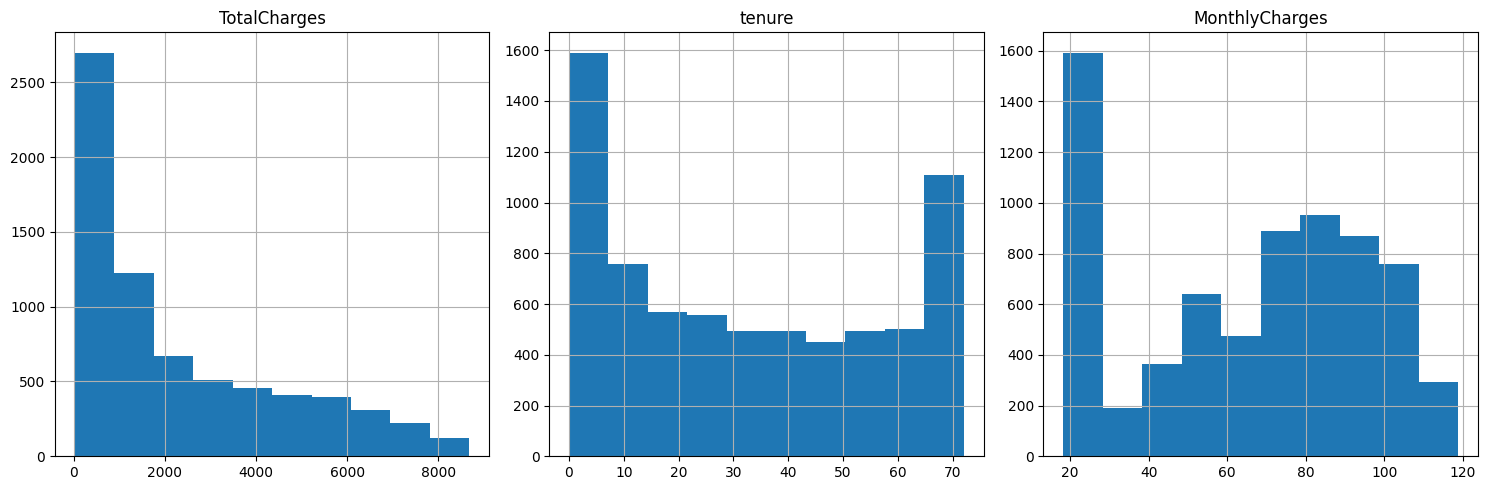

In [84]:
data[["TotalCharges", "tenure", "MonthlyCharges"]].hist(figsize=(15, 5), layout=(1, 3))
plt.tight_layout()
plt.show()

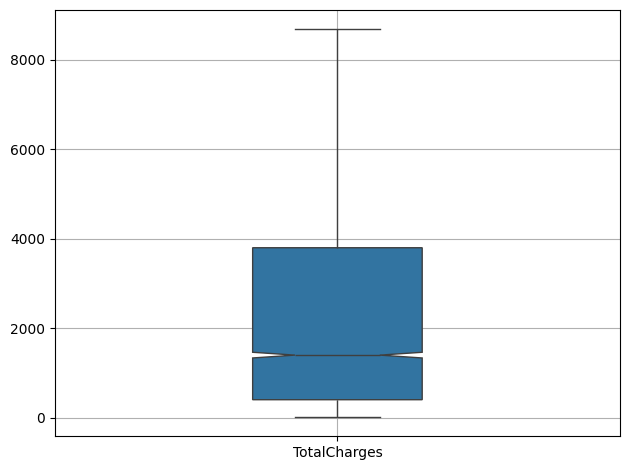

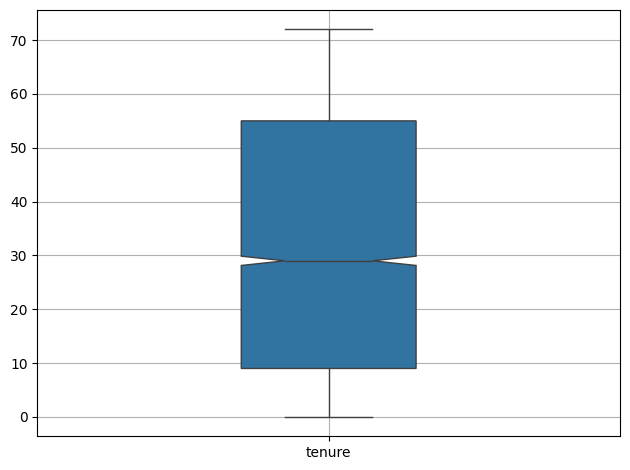

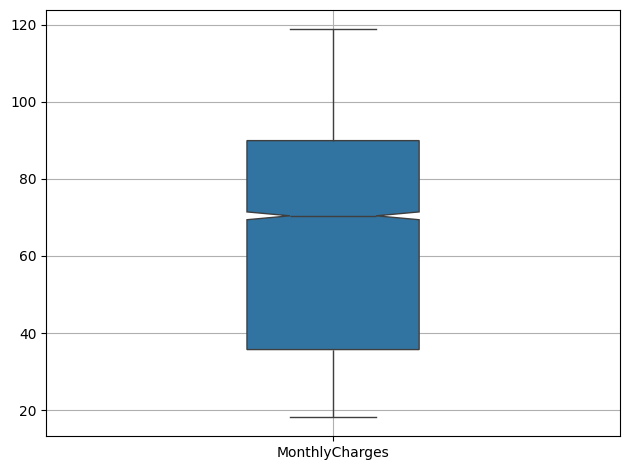

In [85]:
for col in data[["TotalCharges", "tenure", "MonthlyCharges"]]:
    sns.boxplot(data=data[[col]], width=0.3, notch=True)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Check if it's high skewness or not

In [86]:
data["TotalCharges"].skew()

np.float64(0.9601282234505053)

cause it's lowest than 1 I will not use log


In [87]:
data.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0


In [88]:
data.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
MultipleLines        object
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [89]:
numeric_columns = data.select_dtypes(include = 'number').columns
categorical_columns = data.select_dtypes(include = 'object').columns

In [90]:
data[["TotalCharges", "MonthlyCharges", "tenure"]].describe()

,TotalCharges,MonthlyCharges,tenure
count,7022.000000,7022.000000,7022.000000
mean,2286.479792,64.845535,32.464967
std,2266.756866,30.071581,24.536091
min,18.800000,18.250000,0.000000
25%,403.200000,35.712500,9.000000
50%,1400.425000,70.400000,29.000000
75%,3801.600000,89.900000,55.000000
max,8684.800000,118.750000,72.000000


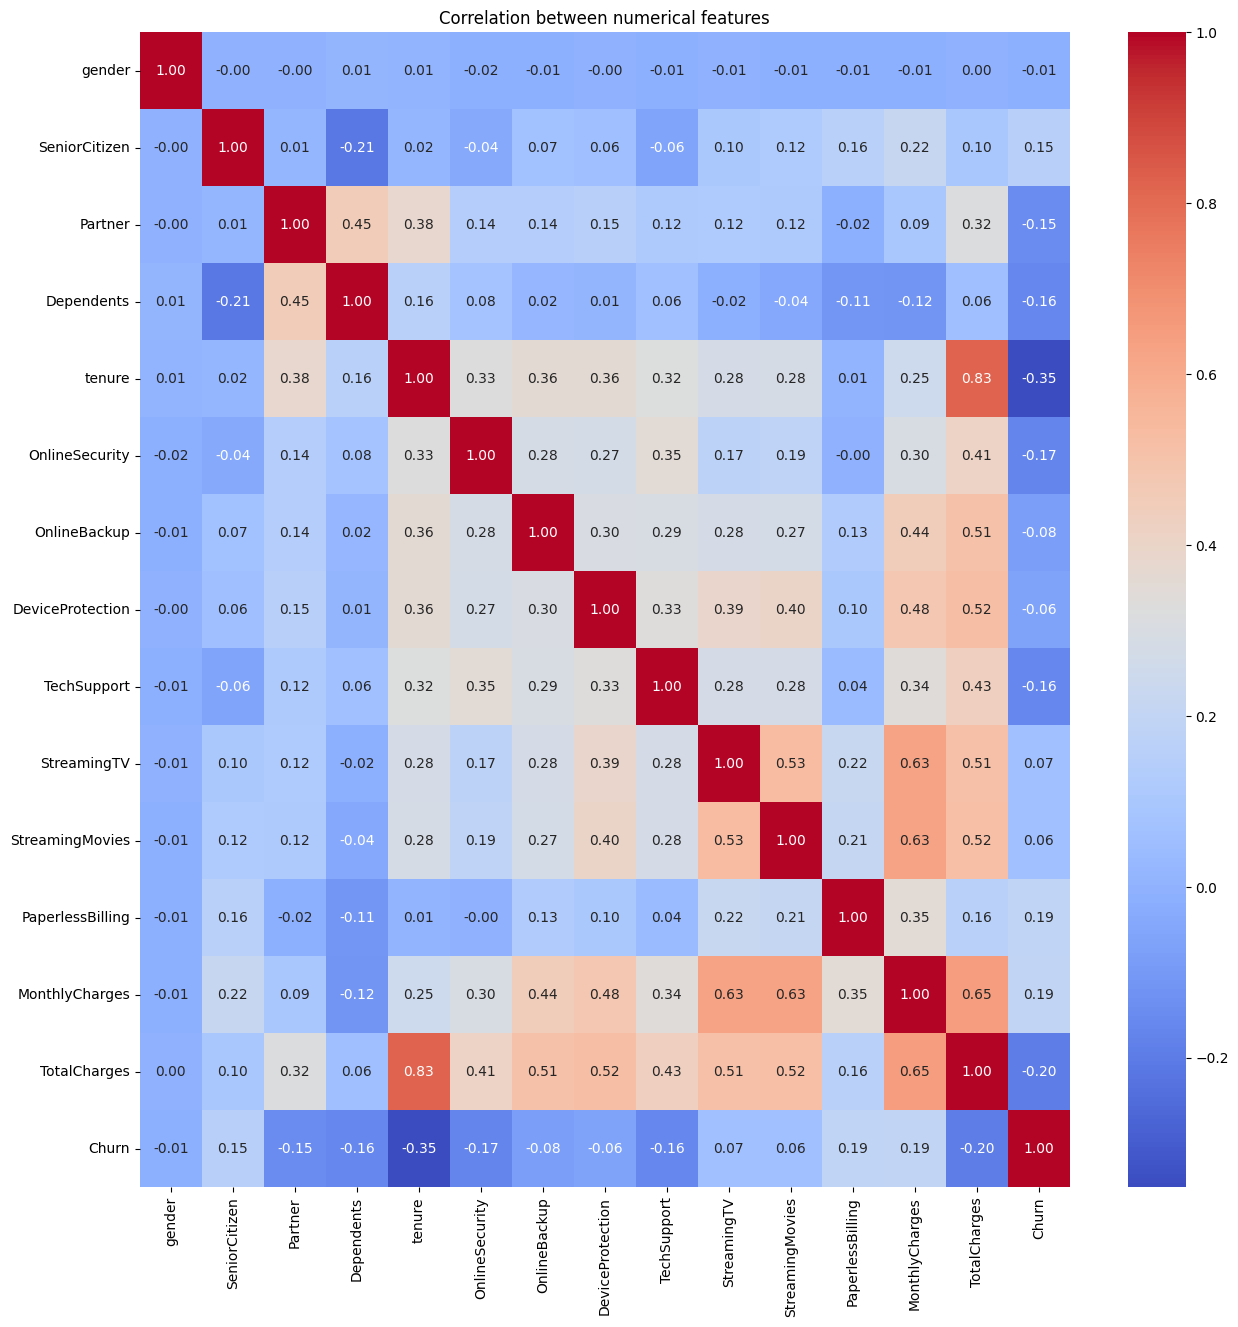

In [91]:
plt.figure(figsize = (15, 15))
sns.heatmap(data[numeric_columns].corr(), annot = True, fmt = ".2f", cmap = "coolwarm")
plt.title("Correlation between numerical features")
plt.show()

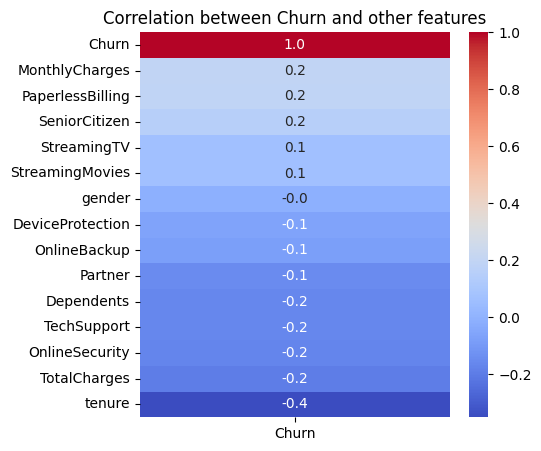

In [92]:
plt.figure(figsize = (5, 5))
sns.heatmap(data[numeric_columns].corr()[["Churn"]].sort_values(by = "Churn", ascending = False), fmt= '.1f', annot = True, cmap = "coolwarm")
plt.title("Correlation between Churn and other features")
plt.show()

## Using Label encoder to encode the categorical columns

In [93]:
data.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,No,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,No,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1


In [94]:
for col in data[[ 'InternetService', 'Contract', 'PaymentMethod']]:
    print(f"Unique values in {col}: {data[col].unique()}")

Unique values in InternetService: ['DSL' 'Fiber optic' 'No']
Unique values in Contract: ['Month-to-month' 'One year' 'Two year']
Unique values in PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [95]:
import joblib

label_encoder = LabelEncoder()
label_encoder_to_save = LabelEncoder()
label_encoder_to_save.fit(data['Contract'])
data["Contract"] = label_encoder.fit_transform(data["Contract"])

joblib.dump(label_encoder_to_save, 'label_encoder.pkl')

['label_encoder.pkl']

### Use one hot encoder

In [96]:
data = pd.get_dummies(
    data, columns=["InternetService", "PaymentMethod", "MultipleLines"]
)

In [97]:
for col in data[["Contract"]]:
    print(f"Unique values in {col}: {data[col].unique()}")

Unique values in Contract: [0 1 2]


In [98]:
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,0,0,1,0,1,0,1,0,0,0,0,0,1,29.85,29.85,0,True,False,False,False,False,True,False,False,True,False
1,1,0,0,0,34,1,0,1,0,0,0,1,0,56.95,1889.50,0,True,False,False,False,False,False,True,True,False,False


In [99]:
data.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
Contract                                     int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No                            bool
PaymentMethod_Bank transfer (au

# Finally save the processed version after applying all the necessary transformation    

In [100]:
data.to_csv("../Data/processed_data.csv", index = False)